# 生成 bilayer graphene 的 tight-binding model 

### 首先，引進所需的模組

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi



### 以及給定所需的參數

In [2]:
a_cc = 0.142  # [nm] carbon-carbon distance
t0 = -2.8      # [eV] nearest neighbour hopping
c0 = 0.335  # [nm] interlayer spacing

### 沿用原先所定義的六角晶格結構

In [3]:
def bilayer_graphene(a = a_cc, c = c0, t = t0):
    
    lat = pb.Lattice(a1 = [ 3*a/2, sqrt(3)*a/2],
                     a2 = [ 3*a/2, -sqrt(3)*a/2])
    
    lat.add_sublattices(('A1', [0, 0, 0]),
                       ('B1', [a/2, sqrt(3)*a/2, 0]),
                       ('A2', [a, 0, -c]),
                       ('B2', [0, 0, -c]))
    
    lat.register_hopping_energies(
        
        {
         'gamma0': t,
         'gamma1': -0.4,
         'gamma3': -0.3,
         'gamma4': -0.04
        })
    
    lat.add_hoppings(([0, 0], 'A1', 'B1', 'gamma0'),
                     ([0, 0], 'B2', 'A2', 'gamma0'),
                     ([-1, 0], 'A1', 'B1', 'gamma0'),
                     ([-1, 0], 'B2', 'A2', 'gamma0'),
                     ([-1, 1], 'A1', 'B1', 'gamma0'),
                     ([0, -1], 'B2', 'A2', 'gamma0'),
                     ([0, 0], 'A1', 'B2', 'gamma1'))
    
    lat.min_neighbors = 2
    
    return lat
    

 <br>畫出 bilayer graphene 的晶格結構

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


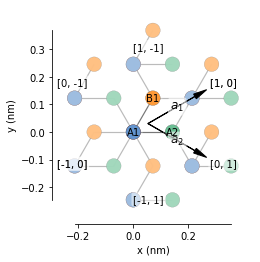

In [4]:
lat = bilayer_graphene()
lat.plot()

<br>以及所對應的 brillouin zone

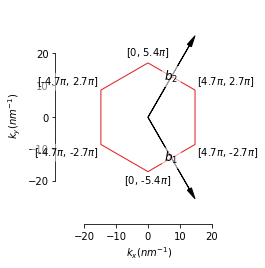

In [5]:
lat.plot_brillouin_zone()

### 建構 bilayer graphene 的 hamiltonian 

In [6]:
model = pb.Model(lat)
hamiltonian = model.hamiltonian.todense()
hamiltonian

matrix([[ 0. , -2.8,  0. , -0.4],
        [-2.8,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -2.8],
        [-0.4,  0. , -2.8,  0. ]], dtype=float32)

引進 Translational symmertry



/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


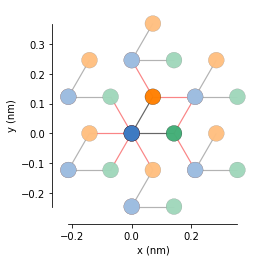

In [9]:
model = pb.Model(lat,
                pb.translational_symmetry())
model.plot()

In [10]:
hamiltonian = model.hamiltonian.todense()
hamiltonian

matrix([[ 0. +0.j, -8.4+0.j,  0. +0.j, -0.4+0.j],
        [-8.4+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
        [ 0. +0.j,  0. +0.j,  0. +0.j, -8.4+0.j],
        [-0.4+0.j,  0. +0.j, -8.4+0.j,  0. +0.j]], dtype=complex64)

In [17]:
solver = pb.solver.lapack(model)
solver.eigenvalues


array([-8.602377, -8.202377,  8.202381,  8.602381], dtype=float32)

## 畫出對應的能帶結構
以上是簡單構建單層 graphene 系統的方式，接著將利用 pb.calc_bands() <br>解出對應的能帶結構。

首先，先定義 brillouin zone 中的高對稱點。

In [18]:
Gamma = [0, 0]
K1 = [2*pi/(3*a_cc), 2*pi/(3*sqrt(3)*a_cc)]
M = [2*pi/(3*a_cc), 0]
K2 = [2*pi/(3*a_cc), -2*pi/(3*sqrt(3)*a_cc)]

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


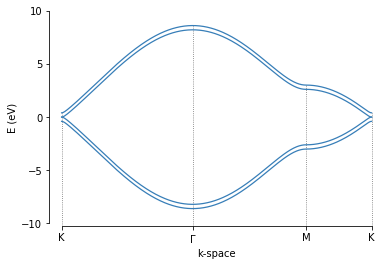

In [19]:
bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])